In [ ]:
# CASE STUDY 01
# Preprocessing

# Done By : JOSHUA DAVID 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [ ]:
# 1. Load the dataset in Python environment 

In [4]:
df = pd.read_csv('train_loan.csv')

In [12]:
print("original dataset:", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
original dataset: None


In [ ]:
# 2. Perform different preprocessing steps


In [ ]:
# 2.a. Missing value handling

The dataset containes several columns with missing or null values. We cannot process the missing data, so we must fill in these null spaces using median, mean and mode. 

For Categorical Columns like *Gender, Married, Dependents, Self_Employed, Credit_History*, The missing values were filled with the mode of each column. The mode is the most frequently occurring value in a category.

For Numerical Columns like *LoanAmount, Loan_Amount_Term*,  The missing values were filled with the median of each column. The median is the middle value when all the numbers are arranged in order.

In [19]:
print("first five: \n", )
df.head()

first five: 



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df.shape

(614, 13)

In [21]:
df.duplicated().sum()

np.int64(0)

In [26]:
data = df.drop_duplicates()

In [27]:
data.duplicated().sum()

np.int64(0)

In [28]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
df['LoanAmount'].head(100)

0       NaN
1     128.0
2      66.0
3     120.0
4     141.0
      ...  
95      NaN
96    137.0
97     50.0
98    115.0
99    131.0
Name: LoanAmount, Length: 100, dtype: float64

In [39]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

/tmp/ipykernel_6392/2375686048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)


In [40]:
df['LoanAmount'].head(100)

0     128.0
1     128.0
2      66.0
3     120.0
4     141.0
      ...  
95    128.0
96    137.0
97     50.0
98    115.0
99    131.0
Name: LoanAmount, Length: 100, dtype: float64

In [41]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

/tmp/ipykernel_6392/1341166818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [42]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# 2.b. Outlier detection

Text(0.5, 1.0, 'LoanAmount')

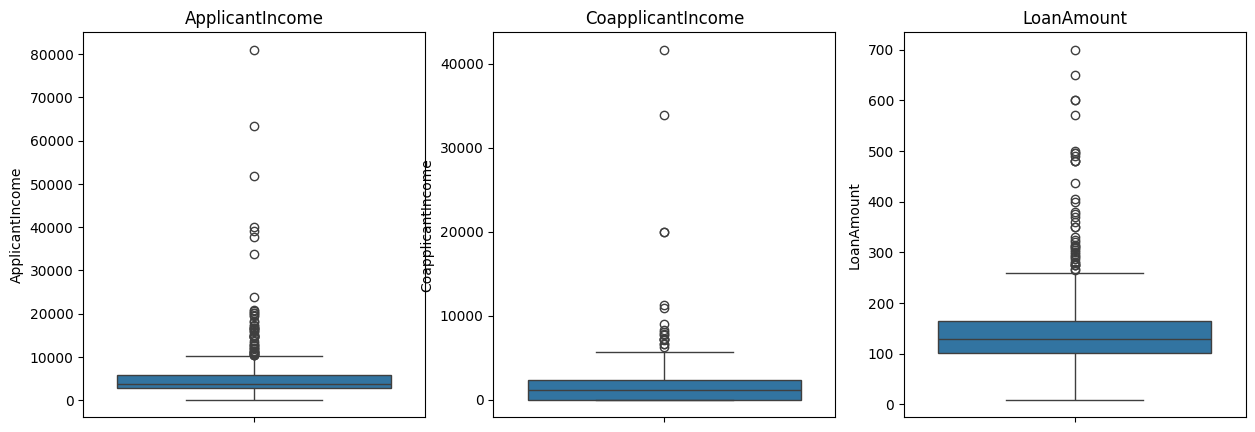

In [56]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['ApplicantIncome'])
plt.title('ApplicantIncome')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['CoapplicantIncome'])
plt.title('CoapplicantIncome')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['LoanAmount'])
plt.title('LoanAmount')


In [57]:
income_cap = df['ApplicantIncome'].quantile(0.95)
df['ApplicantIncome'] = df['ApplicantIncome'].clip(upper=income_cap)


Text(0.5, 1.0, 'LoanAmount')

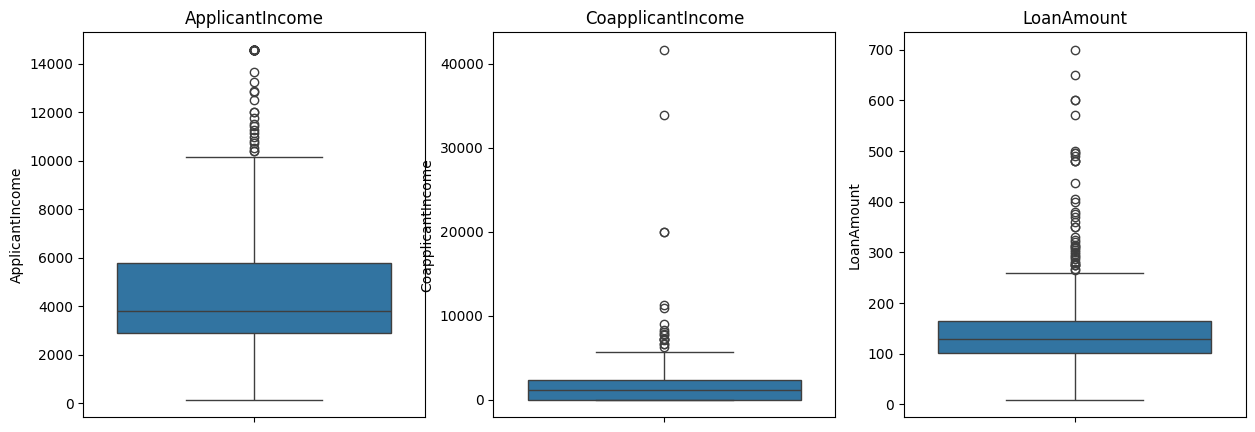

In [58]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['ApplicantIncome'])
plt.title('ApplicantIncome')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['CoapplicantIncome'])
plt.title('CoapplicantIncome')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['LoanAmount'])
plt.title('LoanAmount')


In [ ]:
# 2.c. Encoding

In [62]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# df.drop('Loan_ID', axis=1, inplace=True)

In [63]:
df = pd.get_dummies(df, drop_first=True)

In [64]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False,False,True
610,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False,False,False,True
611,8072,240.0,253.0,360.0,1.0,True,True,True,False,False,False,False,False,True,True
612,7583,0.0,187.0,360.0,1.0,True,True,False,True,False,False,False,False,True,True


In [ ]:
# 2.d. Scaling

In [65]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False,False,True
610,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False,False,False,True
611,8072,240.0,253.0,360.0,1.0,True,True,True,False,False,False,False,False,True,True
612,7583,0.0,187.0,360.0,1.0,True,True,False,True,False,False,False,False,True,True


In [67]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [69]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [70]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.299697,-0.554487,-0.211241,0.273231,0.411733,True,False,False,False,False,False,False,False,True,True
1,-0.096384,-0.038732,-0.211241,0.273231,0.411733,True,True,True,False,False,False,False,False,False,False
2,-0.591641,-0.554487,-0.948996,0.273231,0.411733,True,True,False,False,False,False,True,False,True,True
3,-0.722104,0.251980,-0.306435,0.273231,0.411733,True,True,False,False,False,True,False,False,True,True
4,0.346939,-0.554487,-0.056551,0.273231,0.411733,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.622928,-0.554487,-0.889500,0.273231,0.411733,False,False,False,False,False,False,False,False,False,True
610,-0.245618,-0.554487,-1.258378,-2.522836,0.411733,True,True,False,False,True,False,False,False,False,True
611,0.995185,-0.472404,1.276168,0.273231,0.411733,True,True,True,False,False,False,False,False,True,True
612,0.842197,-0.554487,0.490816,0.273231,0.411733,True,True,False,True,False,False,False,False,True,True


In [71]:
print(df.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.299697          -0.554487   -0.211241          0.273231   
1        -0.096384          -0.038732   -0.211241          0.273231   
2        -0.591641          -0.554487   -0.948996          0.273231   
3        -0.722104           0.251980   -0.306435          0.273231   
4         0.346939          -0.554487   -0.056551          0.273231   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0        0.411733         True        False         False         False   
1        0.411733         True         True          True         False   
2        0.411733         True         True         False         False   
3        0.411733         True         True         False         False   
4        0.411733         True        False         False         False   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0          False                   False              False

In [ ]:
# 3. Give detailed description for each step

**2. Perform different preprocessing steps**

***a. Missing value handling***

The dataset containes several columns with missing or null values. We cannot process the missing data, so we must fill in these null spaces using median, mean and mode. 

For Categorical Columns like *Gender, Married, Dependents, Self_Employed, Credit_History*, The missing values were filled with the mode of each column. The mode is the most frequently occurring value in a category.

For Numerical Columns like *LoanAmount, Loan_Amount_Term*,  The missing values were filled with the median of each column. The median is the middle value when all the numbers are arranged in order.

***b. Outlier detection***

Outliers are data points that are significantly different from other observations. these can negatively impact a model's performance by giving a wrong sense of the data's range. We can identify outliers visually using box plots. and clean it we use set a ceiling at the 95th percentile for the ApplicantIncome column. Any income value above this ceiling was replaced with the 95th percentile value itself.

***c. Encoding***

Ml models are mathematical, meaning they can only work with numbers. Therefore, all non-numeric that is text based columns are tp be converted into a numerical format. This process is called encoding. We use one-hot encoding for features where the categories have no natural order. It prevents the model from assuming a false relationship between categories. The drop_first=True argument is used to avoid multi relationshps, where one new column can be perfectly predicted from the others.

***d. Scaling***

The final preprocessing step was to scale the numerical features. Features like ApplicantIncome and Credit_History exist on vastly different scales from 1000-2000 to 0-1. Some models are might not be accurate to this and might give more importance to the feature with the larger valeus. To address this, we used the StandardScaler from the Scikit-learn library. This scaler transforms each numerical feature to have a mean of 0 and a standard deviation of 1.